In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import datetime as dt
import warnings

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Settings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

# Display options
pd.options.display.max_columns = 50
pd.options.display.max_rows = 10

In [46]:
df_label = pd.read_csv('status.csv')
df_values = pd.read_csv('pump.csv')
df_test=pd.read_csv('pump_test.csv')

In [47]:
# Taking a first look
df_test.head(5)

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

                     basin  subvillage   region  region_code  district_code  \
0                 Internal      Magoma  Manyara           21              3   
1                  Pangani     Kimnyak   Arusha            2              2   
2                 Internal       Msatu  Singida           13              2   
3  Ruvuma / Southern Coast  Kipindimbi    Lindi           80             43   
4  Ruvuma / Southern Coast     Losonga   Ruvuma           10              3   

             lga          ward  population public_meeting  \
0          Mbulu        Bashay         321           True   
1   Arusha Rural      Kimnyaki         300           True   
2  Singida Rural          Puma         500           True   
3         Liwale       Mkutano         250            NaN   
4         Mbinga  Mbinga Urban          60            NaN   

               recorded_by scheme_management     scheme_name permit  \
0  GeoData Consultants Ltd        Parastatal             NaN   True   
1  GeoData Consultants Ltd               VWC  TPRI pipe line   True   
2  GeoData Consultants Ltd               VWC               P    NaN   
3  GeoData Consultants Ltd               VWC             NaN   True   
4  GeoData Consultants Ltd       Water Board          BRUDER   True   

   construction_year extraction_type extraction_type_group  \
0               2012           other                 other   
1               2000         gravity               gravity   
2               2010           other                 other   
3               1987           other                 other   
4               2000         gravity               gravity   

  extraction_type_class   management management_group      payment  \
0                 other   parastatal       parastatal    never pay   
1               gravity          vwc       user-group    never pay   
2                 other          vwc       user-group    never pay   
3                 other          vwc       user-group      unknown   
4               gravity  water board       user-group  pay monthly   

  payment_type water_quality quality_group      quantity quantity_group  \
0    never pay          soft          good      seasonal       seasonal   
1    never pay          soft          good  insufficient   insufficient   
2    never pay          soft          good  insufficient   insufficient   
3      unknown          soft          good           dry            dry   
4      monthly          soft          good        enough         enough   

                 source           source_type source_class  \
0  rainwater harvesting  rainwater harvesting      surface   
1                spring                spring  groundwater   
2  rainwater harvesting  rainwater harvesting      surface   
3          shallow well          shallow well  groundwater   
4                spring                spring  groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other      

In [48]:
df_values.head(5)

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe 

In [49]:
df_label.head(5)

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [50]:
#Merging the 2 files together
df_values=pd.merge(df_values,df_label,on="id",how="inner",indicator=True)

In [51]:
df_values['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [53]:
df_test['status_group']='unknown'

In [54]:
df_test['status_group'].value_counts()

unknown    14850
Name: status_group, dtype: int64

In [55]:
df_values_combined=pd.concat([df_values, df_test])

### Understanding into the combined data

In [56]:
df_values_combined.shape

(74250, 42)

In [57]:
df_values_combined

id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
14845  39307         0.0    2011-02-24                  Danida          34   
14846  18990      1000.0    2011-03-21                    Hiap           0   
14847  28749         0.0    2013-03-04                     NaN        1476   
14848  33492         0.0    2013-02-18                 Germany         998   
14849  68707         0.0    2013-02-13  Government Of Tanzania         481   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
14845            Da  38.852669  -6.582841             Kwambwezi            0   
14846          HIAP  37.451633  -5.350428      Bonde La Mkondoa            0   
14847           NaN  34.739804  -4.585587               Bwawani            0   
14848           DWE  35.432732 -10.584159              Kwa John            0   
14849    Government  34.765054 -11.226012      Kwa Mzee Chagala            0   

                         basin   subvillage   region  region_code  \
0                   Lake Nyasa     Mnyusi B   Iringa           11   
1                Lake Victoria      Nyamara     Mara           20   
2                      Pangani      Majengo  Manyara           21   
3      Ruvuma / Southern Coast   Mahakamani   Mtwara           90   
4                Lake Victoria   Kyanyamisa   Kagera           18   
...                        ...          ...      ...          ...   
14845              Wami / Ruvu        Yombo    Pwani            6   
14846                  Pangani      Mkondoa    Tanga            4   
14847                 Internal       Juhudi  Singida           13   
14848               Lake Nyasa  Namakinga B   Ruvuma           10   
14849               Lake Nyasa        Kamba   Ruvuma           10   

       district_code            lga        ward  population public_meeting  \
0                  5         Ludewa    Mundindi         109           True   
1                  2      Serengeti       Natta         280            NaN   
2                  4      Simanjiro     Ngorika         250           True   
3                 63       Nanyumbu    Nanyumbu          58           True   
4                  1        Karagwe  Nyakasimbi           0           True   
...              ...            ...         ...         ...            ...   
14845              1       Bagamoyo       Yombo          20           True   
14846              7        Kilindi     Mvungwe        2960           True   
14847              2  Singida Rural     Ughandi         200           True   
14848              2   Songea Rural    Maposeni         150           True   
14849              3         Mbinga  Mbamba bay          40           True   

                   recorded_by scheme_management                  scheme_name  \
0      GeoData Consultants Ltd               VWC                        Roman   
1      GeoData Consultants Ltd             Other                          NaN   
2      GeoData Consultants Ltd               VWC  Nyumba ya mungu pipe scheme   
3      GeoData Consult

In [58]:
df_values_combined.drop(columns=['_merge','Unnamed: 0'], inplace=True, errors='ignore')

In [59]:
df_values_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [60]:
# looking at label distribution
df_values_combined.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
unknown                    14850
dtype: int64

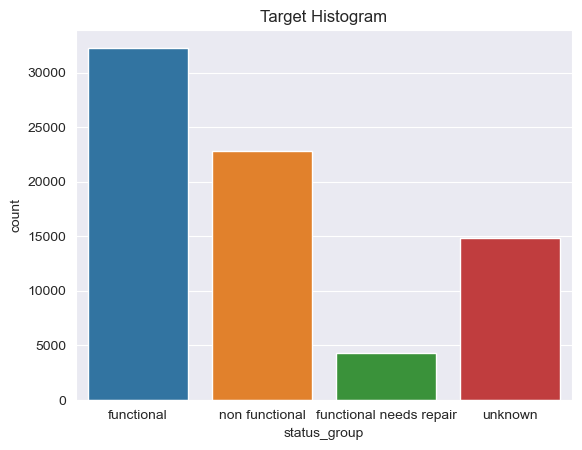

In [61]:
fig = sns.countplot(df_values_combined['status_group'])
plt.title('Target Histogram')
plt.show(fig)

In [62]:
# counting NAs per column
cols_with_none = df_values_combined.isnull().sum()
cols_with_none = cols_with_none[cols_with_none>0]
cols_with_none

funder                4504
installer             4532
subvillage             470
public_meeting        4155
scheme_management     4846
scheme_name          35258
permit                3793
dtype: int64

## 1.Data Cleaning

Few variables have NAs, let's go through each of the variables to spot some other possible problems

In [63]:
#variables with null values along with other variables are analysed and cleaned.



### 1.1. Subvillage

In [64]:
# top 20 subvillages
df_values_combined.groupby(['subvillage'])['id'].count().sort_values(ascending=False)[:20]

subvillage
Shuleni      646
Majengo      631
Madukani     629
Kati         467
Mtakuja      322
            ... 
Kibaoni      143
Mjini        131
Mjimwema     129
Mapinduzi    126
Mwenge       125
Name: id, Length: 20, dtype: int64

In [65]:
# Impute the NAs to Unknown
df_values_combined.subvillage.fillna(value='other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
df_values_combined.loc[df_values_combined.subvillage.str.len() == 1, 'subvillage'] = 'other'

### 1.2.Amount tsh: amount of water in the basin

In [66]:
# Some significant values:
print('max:',df_values_combined.amount_tsh.max())
print('min:',df_values_combined.amount_tsh.min())
print('mean:',df_values_combined.amount_tsh.mean())
print('median:',df_values_combined.amount_tsh.median())

max: 350000.0
min: 0.0
mean: 318.6857043771044
median: 0.0


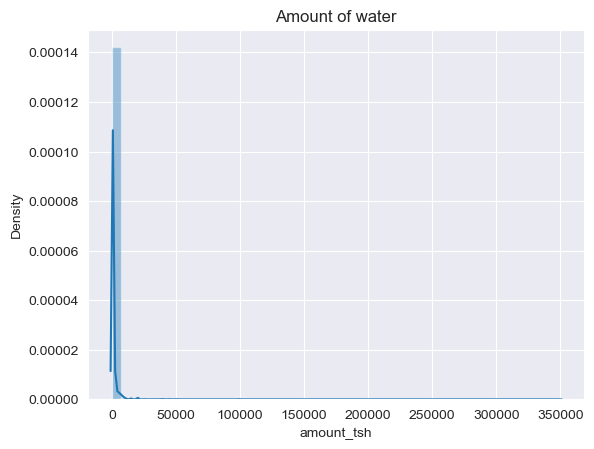

In [67]:
fig = sns.distplot(df_values_combined['amount_tsh'])
plt.title('Amount of water')
plt.show(fig)

In [68]:

df_values_combined['amt'] = np.log(df_values_combined['amount_tsh']+1)

In [69]:
df_values_combined['amount'] = 0

In [70]:
df_values_combined['amt'].describe()

count    74250.000000
mean         1.586515
std          2.638600
min          0.000000
25%          0.000000
50%          0.000000
75%          3.044522
max         12.765691
Name: amt, dtype: float64

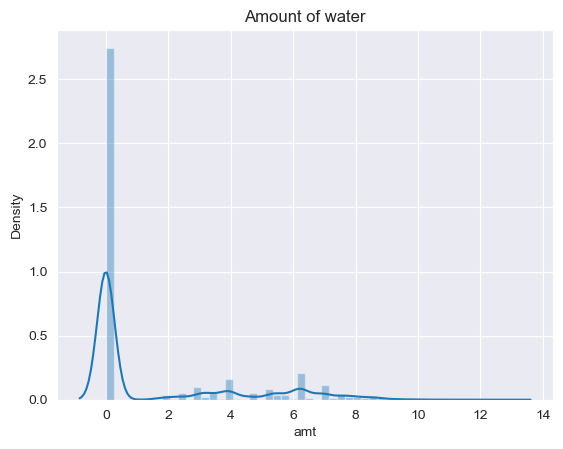

In [71]:
fig = sns.distplot(df_values_combined['amt'])
plt.title('Amount of water')
plt.show(fig)

In [72]:
df_values_combined.loc[(df_values_combined['amt'] > df_values_combined['amt'].quantile(0.95)), 'amount'] = 1

In [73]:
df_values_combined.loc[:, 'amount'].value_counts()

0    70830
1     3420
Name: amount, dtype: int64

In [74]:
# Too many zeros, let's drop the column
df_values_combined = df_values_combined.drop('amount_tsh', axis=1)

In [75]:
df_values_combined = df_values_combined.drop('amount', axis=1)

### 1.3. Date recorded: date in which the row was inserted

In [76]:
df_values_combined.date_recorded[:10]

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
5    2011-03-13
6    2012-10-01
7    2012-10-09
8    2012-11-03
9    2011-08-03
Name: date_recorded, dtype: object

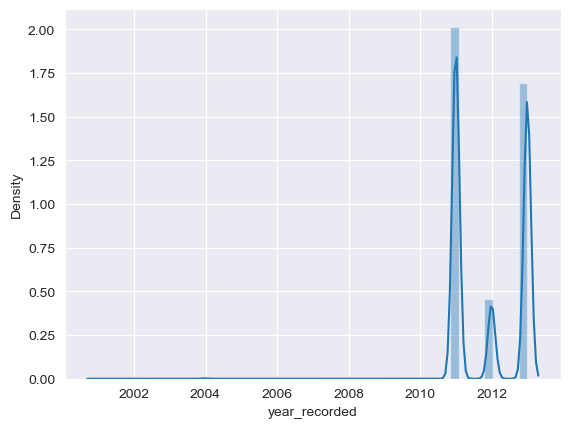

In [77]:
# Let's split it to year and month
df_values_combined['year_recorded'] = df_values_combined.date_recorded.str.slice(0,4)
df_values_combined['month_recorded'] = df_values_combined.date_recorded.str.slice(5,7)

# Convert them to integer
df_values_combined.year_recorded = df_values_combined.year_recorded.astype('float', errors='ignore')
df_values_combined.month_recorded = df_values_combined.month_recorded.astype('float', errors='ignore')

# And drop the date column
df_values_combined = df_values_combined.drop('date_recorded', axis=1)
# Distribution
sns.distplot(df_values_combined.year_recorded);

In [78]:
df_values_combined.groupby(['year_recorded'])['id'].count()

year_recorded
2001.0        1
2002.0        1
2004.0       41
2011.0    35908
2012.0     8089
2013.0    30210
Name: id, dtype: int64

In [79]:
#drop, 2001, 2004 and 2004 due to less data and chance that they were miss labelled 
df_values_combined.loc[df_values_combined.year_recorded == 2001.0, 'year_recorded'] = 2011
df_values_combined.loc[df_values_combined.year_recorded == 2002.0, 'year_recorded'] = 2012
df_values_combined.loc[df_values_combined.year_recorded == 2004.0, 'year_recorded'] = 2014

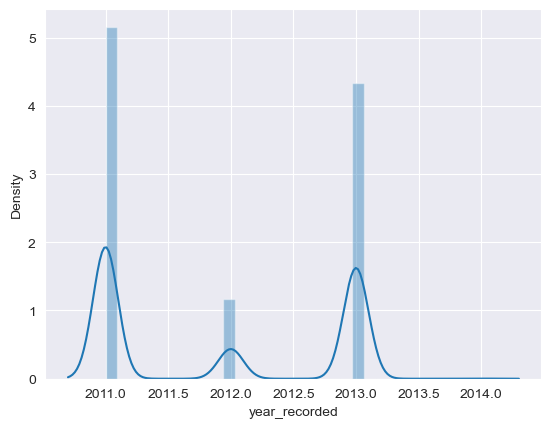

In [80]:
# New distribution
sns.distplot(df_values_combined.year_recorded)

### 1.4. Funder 

In [81]:
df_values_combined.groupby(['funder']).size().sort_values(ascending=False)[:10]

funder
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
dtype: int64

In [82]:
# Let's impute them as other for now
df_values_combined.funder.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
df_values_combined.loc[df_values_combined.funder.str.len() == 1, 'funder'] = 'other'

In [83]:
#Create a new column using just the top 20 Funder categories.
df_values_combined['funder_category'] = df_values_combined['funder'] #creating new column
fund = ['Danida','unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']

df_values_combined.loc[~df_values_combined["funder_category"].isin(fund), "funder_category"] = "Others"
df_values_combined['funder_category'].value_counts() 

Others                    38544
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
                          ...  
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Dwe                         605
Name: funder_category, Length: 20, dtype: int64

In [84]:
df_values_combined.drop(columns=['funder'], inplace=True, errors='ignore')

### 1.5. Longitude 

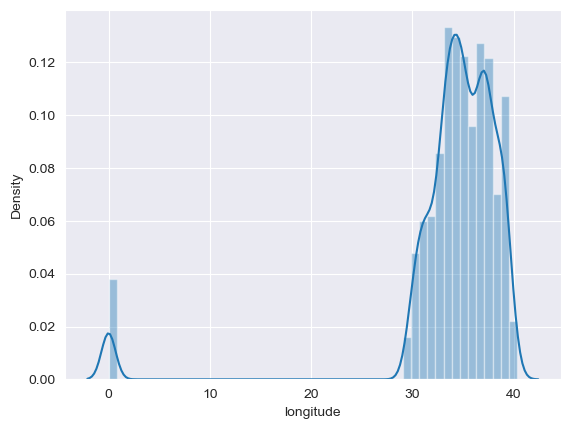

In [85]:
sns.distplot(df_values_combined.longitude)

In [86]:
# Some data has longitude equal zero, which is not possible

#Set the 0 values to NA
df_values_combined.loc[df_values_combined.longitude == 0, 'longitude'] = np.nan
df_values_combined.longitude.isnull().sum()

2269

In [87]:
# Impute the missing coordinates with the average longitude of the subvillage they belong
df_values_combined.longitude.fillna(df_values_combined.groupby(['subvillage'])['longitude'].transform('mean'), inplace=True)
df_values_combined.longitude.isnull().sum()

1410

In [88]:
# Still some NAs, Impute them based on ward (the smallest division after subvillage)
df_values_combined.longitude.fillna(df_values_combined.groupby(['ward'])['longitude'].transform('mean'), inplace=True)
df_values_combined.longitude.isnull().sum()

37

In [89]:
# Still some, keep on imputing by geographical divisions, going wider and wider
df_values_combined.longitude.fillna(df_values_combined.groupby(['lga'])['longitude'].transform('mean'), inplace=True)
df_values_combined.longitude.isnull().sum()

0

In [90]:
# Let's round longitude to 2 decimals
df_values_combined.longitude = df_values_combined.longitude.round(2)

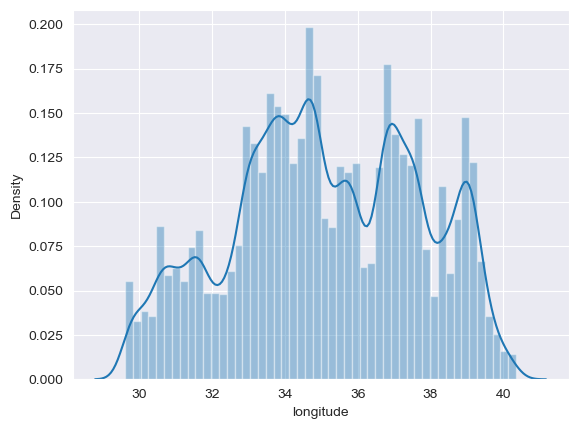

In [91]:
sns.distplot(df_values_combined.longitude) # Much better now

### 1.6. Latitude 

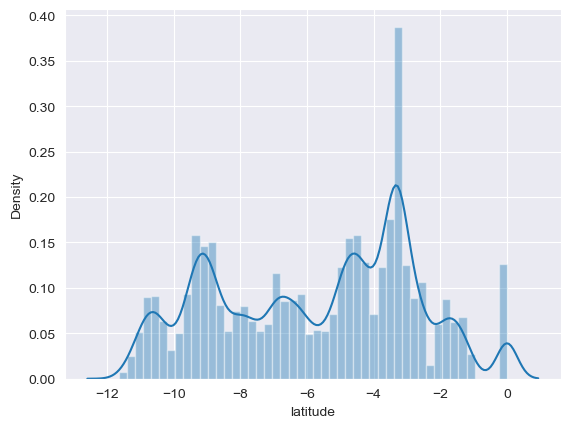

In [92]:
# Let's round latitude to 2 decimals 
df_values_combined.latitude = df_values_combined.latitude.round(2)

sns.distplot(df_values_combined.latitude)

In [93]:
# Tanzania is all below the equator, therefore 0 must be wrong
df_values_combined.loc[df_values_combined.latitude == 0, 'latitude'] = np.nan
df_values_combined.latitude.isnull().sum()
df_values_combined.latitude.fillna(df_values_combined.groupby(['subvillage'])['latitude'].transform('mean'), inplace=True)
df_values_combined.latitude.isnull().sum()

1410

In [94]:
df_values_combined.latitude.fillna(df_values_combined.groupby(['ward'])['latitude'].transform('mean'), inplace=True)
df_values_combined.latitude.isnull().sum()

37

In [95]:
df_values_combined.latitude.fillna(df_values_combined.groupby(['lga'])['latitude'].transform('mean'), inplace=True)
df_values_combined.latitude.isnull().sum()

0

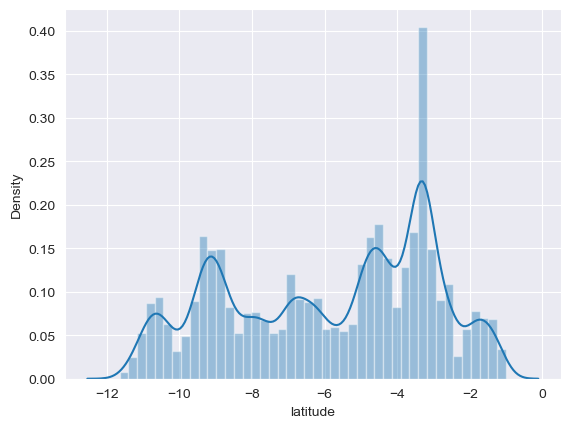

In [96]:
sns.distplot(df_values_combined.latitude) 

### 1.7. GPS Height 

In [97]:
all_data = df_values_combined 

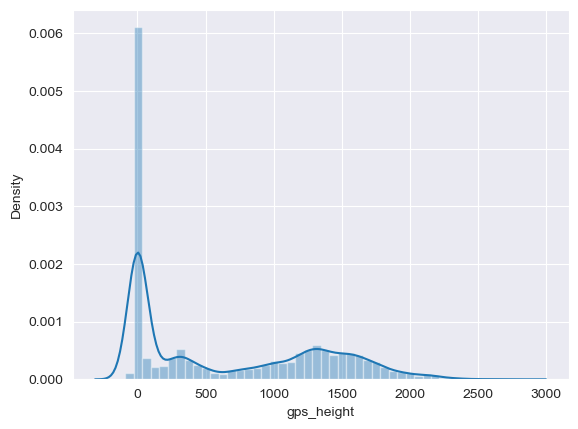

In [98]:
sns.distplot(all_data.gps_height)

In [99]:
all_data.loc[all_data.gps_height == 0, 'gps_height'] = np.nan
all_data.gps_height.isnull().sum()

25649

In [100]:
all_data.gps_height.fillna(all_data.groupby(['subvillage'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

19108

In [101]:
all_data.gps_height.fillna(all_data.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

2222

In [102]:
all_data.gps_height.fillna(all_data.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

114

In [103]:
all_data.gps_height.fillna(all_data.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

0

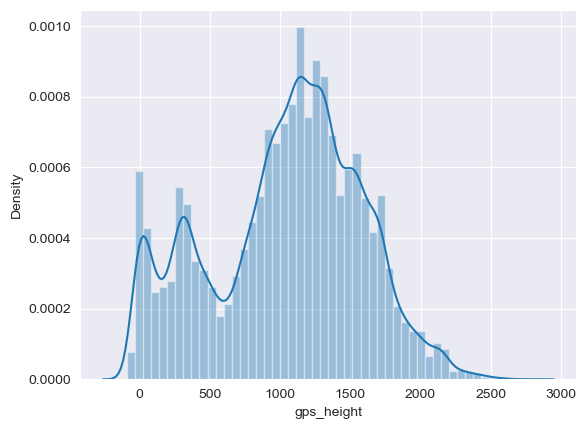

In [104]:
sns.distplot(all_data.gps_height)

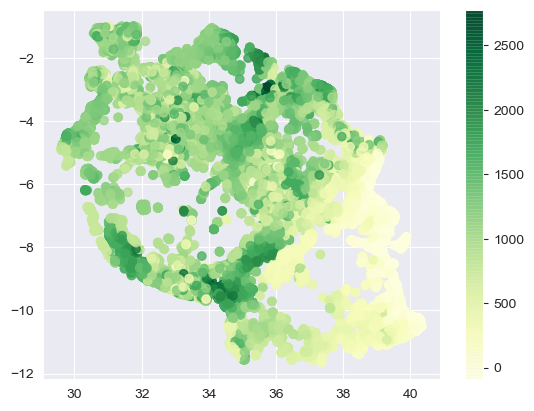

In [105]:
# Plot of gps coordinates colored by gps height. Seems correct
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.gps_height, cmap = 'YlGn')
cbar = plt.colorbar()

### 1.8. Installer 

In [106]:
all_data.groupby(['installer'])['id'].count().sort_values(ascending=False)[:10]

installer
DWE           21751
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
0               980
TCRS            887
CES             765
Name: id, dtype: int64

In [107]:
# Let's impute them as unknown for now
all_data.installer.fillna('Unknown', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.installer.str.len() == 1, 'installer'] = 'Unknown'

all_data.installer.isnull().sum()

0

In [108]:
df_values_combined = all_data
#The values with spelling mistakes have been corrected here
df_values_combined['installer'].replace(to_replace=('District Water Department','District water depar','Distric Water Department'),value ='District water department' , inplace=True)

df_values_combined['installer'].replace(to_replace=('FinW','FINI WATER'), value ='Fini water' , inplace=True)
df_values_combined['installer'].replace(to_replace=('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci','District Council','Council','Counc','District  Council','Distri'), value ='District council' , inplace=True)

df_values_combined['installer'].replace(to_replace=('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C','RC CH','RC church','RC CATHORIC',) ,value ='RC Church' , inplace=True)

df_values_combined['installer'].replace(to_replace=('Central Government','Tanzania Government', 'central government','Cental Government', 'Cebtral Government', 'Tanzanian Government','Tanzania government', 'Centra Government',
'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 'Centra govt') , value ='Central government' , inplace=True)

df_values_combined['installer'].replace(to_replace=('World vision', 'World Division','World Vision'),value ='world vision' , inplace=True)
df_values_combined['installer'].replace(to_replace=('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df_values_combined['installer'].replace(to_replace= 'DANID', value ='DANIDA' , inplace=True)

df_values_combined['installer'].replace(to_replace=('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi','Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 'Villaers','Village Community', 'Villag','Villege Council', 'Village council','Village  Council','Villagerd','Villager', 'Village Technician', 'Village Office','Village community members'),value ='villagers' , inplace=True)

df_values_combined['installer'].replace(to_replace=('Commu','Communit','commu','COMMU', 'COMMUNITY'), value ='Community' , inplace=True)

df_values_combined['installer'].replace(to_replace=('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove','Governme','Governmen' ) ,value ='Government' , inplace=True)

df_values_combined['installer'].replace(to_replace='Hesawa' ,value ='HESAWA' , inplace=True)

In [109]:
df_values_combined['installer'].value_counts().head(20)

DWE           21751
Unknown        5693
Government     3337
Community      2112
DANIDA         1995
              ...  
villagers       514
TASAF           504
LGA             501
WEDECO          496
Unicef          421
Name: installer, Length: 20, dtype: int64

In [110]:
#New column for the top 20 Installers have been created.
df_values_combined['installer_category'] = df_values_combined['installer'] 
inst = ['DWE','Unknown','Government','Community','DANIDA','HESAWA','RWE','District council','Central government','KKKT','TCRS','world vision',
        'CES','Fini water','RC Church','villagers','TASAF','LGA','WEDECO','Unicef']

df_values_combined.loc[~df_values_combined["installer_category"].isin(inst), "installer_category"] = "Others"

In [111]:
df_values_combined['installer_category'].value_counts()

Others        26123
DWE           21751
Unknown        5693
Government     3337
Community      2112
              ...  
villagers       514
TASAF           504
LGA             501
WEDECO          496
Unicef          421
Name: installer_category, Length: 21, dtype: int64

In [112]:
df_values_combined.drop(columns=['installer'], inplace=True, errors='ignore')

### 1.9. wpt_name

In [113]:
# The wpt_name column is combined to create a column of 0 and 1's where 0 represents the none data and 1 represent all the other

df_values_combined['wpt']=1
df_values_combined.loc[(df_values_combined['wpt_name'] == 'none'), 'wpt'] = 0
df_values_combined.loc[:, 'wpt'].value_counts()
df_values_combined.drop(columns=['wpt_name'], inplace=True, errors='ignore')

### 1.10. Num private: no descrition of this 

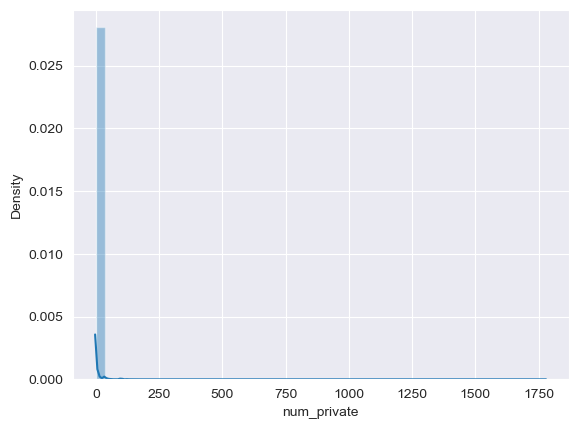

In [114]:
sns.distplot(df_values_combined.num_private)  

In [115]:
# Drop the feature
df_values_combined = df_values_combined.drop('num_private', axis=1)

### 1.11. Basin: geographical basin 

In [116]:
df_values_combined.groupby(['basin']).size() # Everything good here

basin
Internal                    9642
Lake Nyasa                  6332
Lake Rukwa                  3059
Lake Tanganyika             8052
Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Ruvuma / Southern Coast     5587
Wami / Ruvu                 7577
dtype: int64

### 1.12. Region 

In [117]:
df_values_combined.groupby(['region']).size().sort_values(ascending=False)[:10] 
# Everything good here

region
Iringa         6599
Shinyanga      6293
Mbeya          5758
Kilimanjaro    5494
Morogoro       5038
Kagera         4174
Arusha         4111
Mwanza         3897
Kigoma         3533
Pwani          3331
dtype: int64

### 1.13. Region code

In [118]:
df_values_combined.groupby(['region_code']).size().sort_values(ascending=False)[:10]
# Everything good here

region_code
11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
dtype: int64

In [119]:
df_values_combined.groupby(['region','region_code']).size()[:10]

region         region_code
Arusha         2              3709
               24              402
Dar es Salaam  7              1020
Dodoma         1              2779
Iringa         11             6599
Kagera         18             4174
Kigoma         16             3533
Kilimanjaro    3              5494
Lindi          8               375
               18                9
dtype: int64

In [120]:
# region_code has more informations, let's drop region column
all_data = all_data.drop('region', axis=1)

### 1.14. District code 

In [121]:
df_values_combined.groupby(['district_code']).size().sort_values(ascending=False)[:10] 
# Everything good here

district_code
1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
dtype: int64

In [122]:
df_values_combined.groupby(['region_code','district_code']).size()[:10]

region_code  district_code
1            0                  27
             1                1107
             3                 460
             4                 439
             5                 467
             6                 279
2            1                 226
             2                1460
             3                 143
             5                 245
dtype: int64

In [123]:
# district code repeats in different regions, let's drop it
df_values_combined = df_values_combined.drop('district_code', axis=1)

### 1.15. Lga 

In [124]:
df_values_combined.groupby(['lga']).size().sort_values(ascending=False)[:10] 

lga
Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
Kilosa          1368
Kasulu          1322
Mbozi           1286
Bagamoyo        1263
Meru            1244
dtype: int64

In [125]:
df_values_combined.groupby(['region_code', 'lga']).size()[:10] # Everything good here

region_code  lga         
1            Bahi             279
             Chamwino         439
             Dodoma Urban     467
             Kondoa           644
             Kongwa           460
             Mpwapwa          490
2            Arusha Rural    1521
             Arusha Urban      82
             Longido          391
             Meru            1244
dtype: int64

### 1.16. Population 

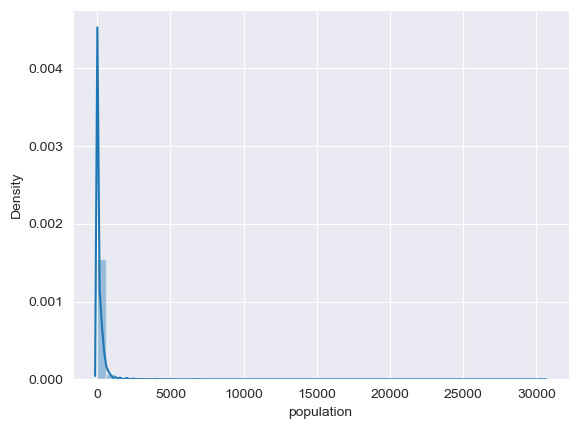

In [126]:
sns.distplot(df_values_combined.population)

In [127]:
df_values_combined.groupby(['population']).size().sort_values(ascending=False)[:10]
# Zero is not really possible, let's impute again by averages 

population
0      26834
1       8782
200     2370
150     2328
250     2087
300     1842
50      1437
100     1419
500     1274
350     1252
dtype: int64

In [128]:
# Too many zeros, let's impute them by averages as for the geographical coordinates
df_values_combined.loc[df_values_combined.population == 0, 'population'] = np.nan
df_values_combined.population.isnull().sum()

26834

In [129]:
# by subvillage
df_values_combined.population.fillna(df_values_combined.groupby(['subvillage'])['population'].transform('median'), inplace=True)
df_values_combined.population.isnull().sum()

19359

In [130]:
# by ward
df_values_combined.population.fillna(df_values_combined.groupby(['ward'])['population'].transform('median'), inplace=True)
df_values_combined.population.isnull().sum()

2364

In [131]:
# by lga
df_values_combined.population.fillna(df_values_combined.groupby(['lga'])['population'].transform('median'), inplace=True)
df_values_combined.population.isnull().sum()

114

In [132]:
# by region_code
df_values_combined.population.fillna(df_values_combined.groupby(['region_code'])['population'].transform('median'), inplace=True)
df_values_combined.population.isnull().sum()

0

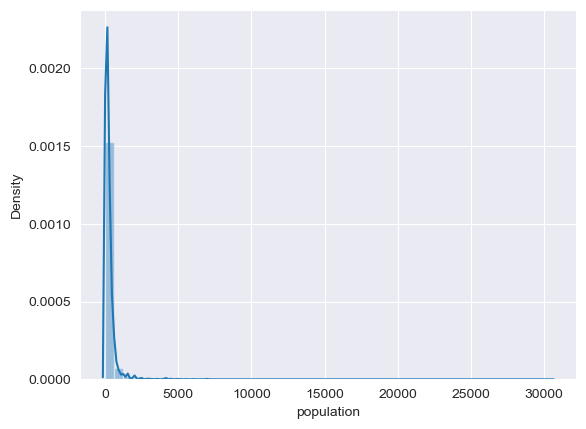

In [133]:
# distribution still vety skewed to the right => taking the log 
sns.distplot(df_values_combined.population)

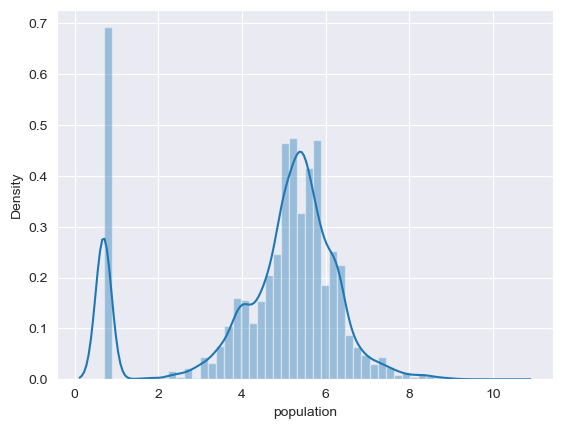

In [134]:
# Looks better now, still not the best
sns.distplot(np.log1p(df_values_combined.population));

In [135]:
# Let's create a new column with the log of population
df_values_combined['population_log'] = np.log1p(df_values_combined.population)

# And drop population
df_values_combined = df_values_combined.drop('population', axis=1)

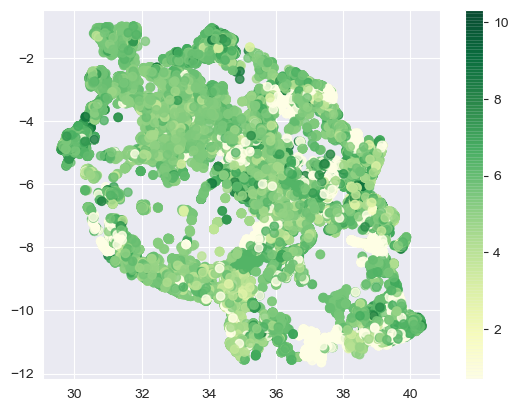

In [136]:
# Population density by geograohical coordinates
plt.scatter(df_values_combined.longitude, df_values_combined.latitude, alpha = .8, c = df_values_combined.population_log, cmap = 'YlGn')
cbar = plt.colorbar()

### 1.17. Public meeting

In [137]:
df_values_combined.groupby(['public_meeting']).size()

public_meeting
False     6346
True     63749
dtype: int64

In [138]:
# Setting True to 1 and False to 0
df_values_combined.loc[df_values_combined.public_meeting == True, 'public_meeting'] = 1
df_values_combined.loc[df_values_combined.public_meeting == False, 'public_meeting'] = 0

# convert the column to integer
df_values_combined.public_meeting = df_values_combined.public_meeting.astype('int', errors='ignore')

# The ratio True:false is 10:1, we can safely impute all the NAs as True 
df_values_combined.public_meeting.fillna(1, inplace=True)
df_values_combined.public_meeting.isnull().sum()

0

### 1.18. Recorded by

In [139]:
df_values_combined.recorded_by.unique() 

array(['GeoData Consultants Ltd'], dtype=object)

In [140]:
# There is only one institution recording, we can drop the column
df_values_combined = df_values_combined.drop('recorded_by', axis=1)

### 1.19. Management 

In [141]:
df_values_combined.scheme_management.fillna('other', inplace=True)
df_values_combined.scheme_management.isnull().sum()

0

### 1.20. Scheme management and Scheme name

In [142]:
df_values_combined.groupby(['scheme_management']).size().sort_values(ascending=False)[:10]
df_values_combined.groupby(['scheme_name']).size().sort_values(ascending=False)[:10]

scheme_name
K                              858
None                           794
Borehole                       704
Chalinze wate                  501
M                              490
DANIDA                         483
Government                     395
Ngana water supplied scheme    335
wanging'ombe water supply s    323
Bagamoyo wate                  296
dtype: int64

In [143]:
df_values_combined.groupby(['scheme_management','scheme_name']).size()[:10]

scheme_management  scheme_name              
Company            BFFS                           1
                   BSF water supplying            1
                   Bagamoyo Wate                 76
                   Bagamoyo wate                272
                   Borehole                       1
                   Borehole drilling project      1
                   Bulamba piped scheme           3
                   Burieni water supply           1
                   Doe water supply               4
                   EKTM 2 water  supply           1
dtype: int64

In [144]:
df_values_combined.groupby(['scheme_management','management']).size()[:10]

scheme_management  management      
Company            company             848
                   other                 2
                   parastatal           30
                   private operator    287
                   vwc                 173
                   wug                   1
None               vwc                   1
Other              other               690
                   parastatal            1
                   private operator     78
dtype: int64

In [145]:
# Let's drop scheme_name, too many levels
df_values_combined = df_values_combined.drop('scheme_name', axis=1)

### 1.21. Permit

In [146]:

df_values_combined.loc[:, 'permit'].value_counts(dropna=False)

True     48606
False    21851
NaN       3793
Name: permit, dtype: int64

In [147]:
df_values_combined['permit'].fillna(True, inplace=True)

### 1.22. Construction year

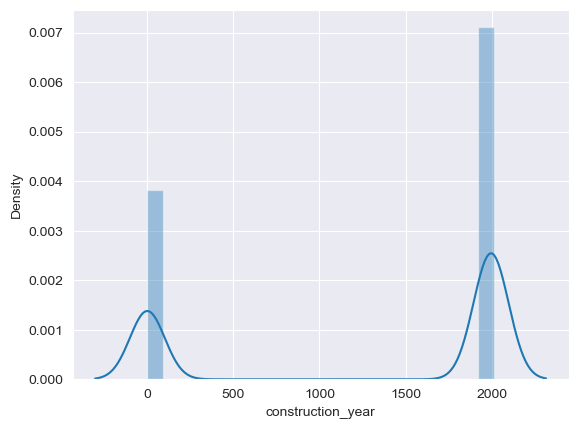

In [148]:
sns.distplot(df_values_combined.construction_year) 

In [149]:
# A lot of zeros, let's go again with geographical medians
df_values_combined.loc[df_values_combined.construction_year == 0, 'construction_year'] = np.nan
df_values_combined.construction_year.isnull().sum()

25969

In [150]:
# by subvillage
df_values_combined.construction_year.fillna(df_values_combined.groupby(['subvillage'])['construction_year'] \
                                  .transform('median'), inplace=True)

df_values_combined.construction_year.isnull().sum()

18875

In [151]:
# by ward
df_values_combined.construction_year.fillna(df_values_combined.groupby(['ward'])['construction_year'] \
                                  .transform('median'), inplace=True)

df_values_combined.construction_year.isnull().sum()

2205

In [152]:
# by lga
df_values_combined.construction_year.fillna(df_values_combined.groupby(['lga'])['construction_year'] \
                                  .transform('median'), inplace=True)

df_values_combined.construction_year.isnull().sum()
114

114

In [153]:
# by region_code
df_values_combined.construction_year.fillna(df_values_combined.groupby(['region_code'])['construction_year'] \
df_values_combined.transform('median'), inplace=True)

df_values_combined.construction_year.isnull().sum()

SyntaxError: invalid syntax (757672805.py, line 3)

In [154]:
# let's remove decimals from the year 
df_values_combined.construction_year = df_values_combined.construction_year.round(0)

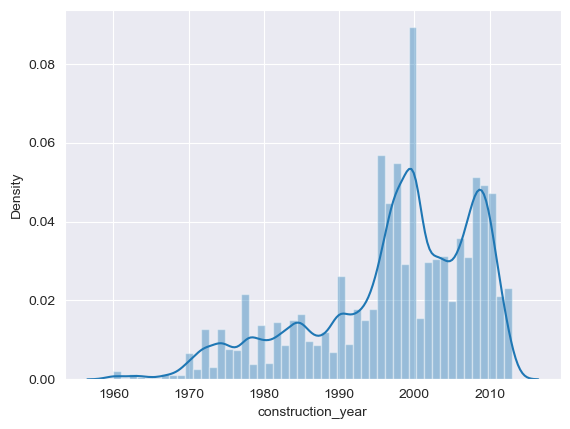

In [155]:
# Let's plot it again
sns.distplot(df_values_combined.construction_year) # Good now

### 1.23. Extraction Type

In [156]:
df_values_combined.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()[:10] 
# All good here

extraction_type  extraction_type_group  extraction_type_class
afridev          afridev                handpump                  2208
cemo             other motorpump        motorpump                  108
climax           other motorpump        motorpump                   41
gravity          gravity                gravity                  33263
india mark ii    india mark ii          handpump                  3029
india mark iii   india mark iii         handpump                   135
ksb              submersible            submersible               1790
mono             mono                   motorpump                 3628
nira/tanira      nira/tanira            handpump                 10205
other            other                  other                     8102
dtype: int64

In [157]:
# Let's keep only extraction_type_class
df_values_combined = df_values_combined.drop('extraction_type', axis=1)
df_values_combined = df_values_combined.drop('extraction_type_group', axis=1)

# And all the values which are clear errors (1, A, M, N, ...)
df_values_combined.loc[all_data.scheme_management == 'None', 'scheme_management'] = 'other'

### 1.24. Payment and payment type

In [158]:
df_values_combined.groupby(['payment','payment_type']).size() # All good here

payment                payment_type
never pay              never pay       31712
other                  other            1314
pay annually           annually         4570
pay monthly            monthly         10397
pay per bucket         per bucket      11266
pay when scheme fails  on failure       4842
unknown                unknown         10149
dtype: int64

In [159]:
# These two are redundant, let's drop payment
df_values_combined = df_values_combined.drop('payment', axis=1)


### 1.25. Water quality

In [160]:
df_values_combined.groupby(['water_quality','quality_group']).size()
# All good here

water_quality       quality_group
coloured            colored            623
fluoride            fluoride           244
fluoride abandoned  fluoride            23
milky               milky             1005
salty               salty             6082
salty abandoned     salty              423
soft                good             63505
unknown             unknown           2345
dtype: int64

In [161]:
# Water quality has more information, let's keep it and drop quality_group
df_values_combined = df_values_combined.drop('quality_group', axis=1)

### 1.26. Quantity and quantity_group

In [162]:
df_values_combined.groupby(['quantity','quantity_group'])['id'].size() # All good here

quantity      quantity_group
dry           dry                7782
enough        enough            41522
insufficient  insufficient      18896
seasonal      seasonal           5075
unknown       unknown             975
Name: id, dtype: int64

In [163]:
# The two columns are equal, let's drop quantity_group
df_values_combined = df_values_combined.drop('quantity_group', axis=1)

### 1.27. Source

In [164]:
df_values_combined.groupby(['source','source_type','source_class']).size() # All good here

source                source_type           source_class
dam                   dam                   surface           840
hand dtw              borehole              groundwater      1108
lake                  river/lake            surface           950
machine dbh           borehole              groundwater     13822
other                 other                 unknown           261
rainwater harvesting  rainwater harvesting  surface          2863
river                 river/lake            surface         11964
shallow well          shallow well          groundwater     21140
spring                spring                groundwater     21216
unknown               other                 unknown            86
dtype: int64

In [165]:
# Source and sopurce_type are equal similar, let's keep source as it has more informations
df_values_combined = df_values_combined.drop('source_type', axis=1)

### 1.28. Water point type

In [166]:
df_values_combined.groupby(['waterpoint_type','waterpoint_type_group']).size() # All good here

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              150
communal standpipe           communal standpipe       35628
communal standpipe multiple  communal standpipe        7611
dam                          dam                          8
hand pump                    hand pump                21884
improved spring              improved spring            959
other                        other                     8010
dtype: int64

In [167]:
# The two columns are equal, let's drop waterpoint_type_group
df_values_combined = df_values_combined.drop('waterpoint_type_group', axis=1)

In [168]:
df_values_combined.isnull().sum()

id                    0
gps_height            0
longitude             0
latitude              0
basin                 0
                     ..
month_recorded        0
funder_category       0
installer_category    0
wpt                   0
population_log        0
Length: 31, dtype: int64

In [169]:
df_values_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   gps_height             74250 non-null  float64
 2   longitude              74250 non-null  float64
 3   latitude               74250 non-null  float64
 4   basin                  74250 non-null  object 
 5   subvillage             74250 non-null  object 
 6   region                 74250 non-null  object 
 7   region_code            74250 non-null  int64  
 8   lga                    74250 non-null  object 
 9   ward                   74250 non-null  object 
 10  public_meeting         74250 non-null  int64  
 11  scheme_management      74250 non-null  object 
 12  permit                 74250 non-null  bool   
 13  construction_year      74136 non-null  float64
 14  extraction_type_class  74250 non-null  object 
 15  ma

## 2. Feature Engineering

### Age column

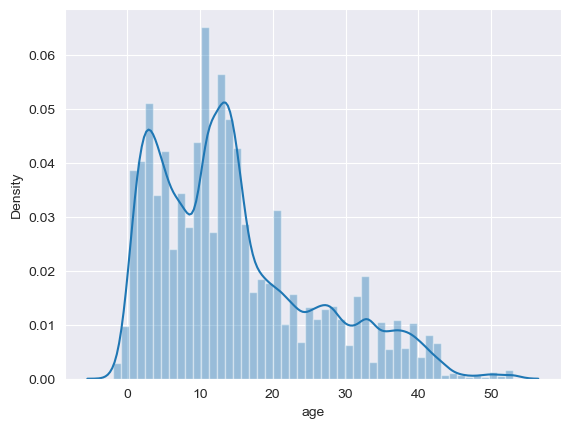

In [170]:
# Let's compute the age when the status was recorded as year_recorded - year_built

df_values_combined['age'] = df_values_combined.year_recorded - df_values_combined.construction_year

sns.distplot(df_values_combined.age)

In [171]:
# Some ages are < 0 which is not possible, let's impute those to age 1 
#all_data.loc[all_data.age < 0, 'age'] = 1 

mean_age = df_values_combined['age'].mean()
df_values_combined.loc[df_values_combined.age < 0, 'age'] = mean_age

### Season

In [172]:


# Jan and Feb short dry season
# long rains lasts during about March, April and May 
# long dry season lasts throughout June, July, August, September and October 
# During November and December there's another rainy season: the 'short rains'

df_values_combined.loc[(df_values_combined.month_recorded <= 2) & (df_values_combined.month_recorded >= 1), 'season'] = 1
df_values_combined.loc[(df_values_combined.month_recorded <= 5) & (df_values_combined.month_recorded >= 3), 'season'] = 2
df_values_combined.loc[(df_values_combined.month_recorded <= 10) & (df_values_combined.month_recorded >= 6), 'season'] = 3
df_values_combined.loc[(df_values_combined.month_recorded <= 12) & (df_values_combined.month_recorded >= 11), 'season'] = 4

# let's see the column
df_values_combined.groupby(['season']).size()

season
1.0    23384
2.0    27802
3.0    20610
4.0     2454
dtype: int64

## 3. EDA

In [173]:
#merged status_group to the train_data at this step for EDA

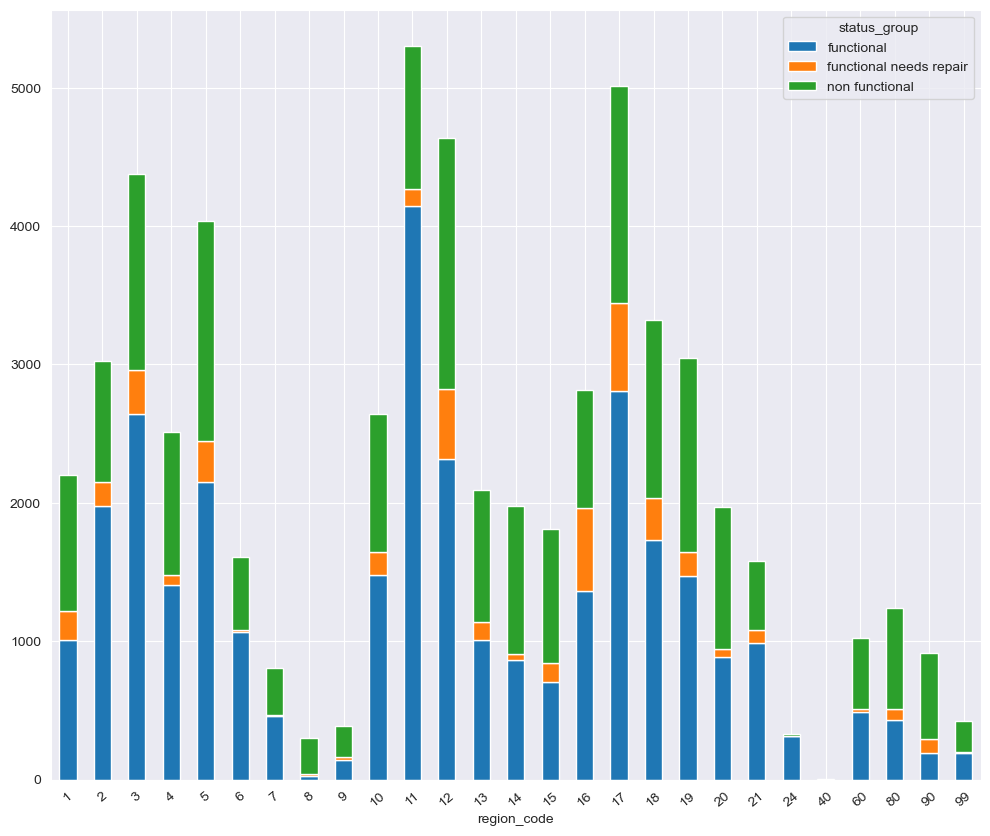

In [174]:
# Let's look at some of the variables with respect to status group

# Creating a df for plotting by merging train data and labels
plot_df = df_values_combined[0:len(df_values)]

# Different regions affect the status?
plot = plot_df.groupby(['region_code', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

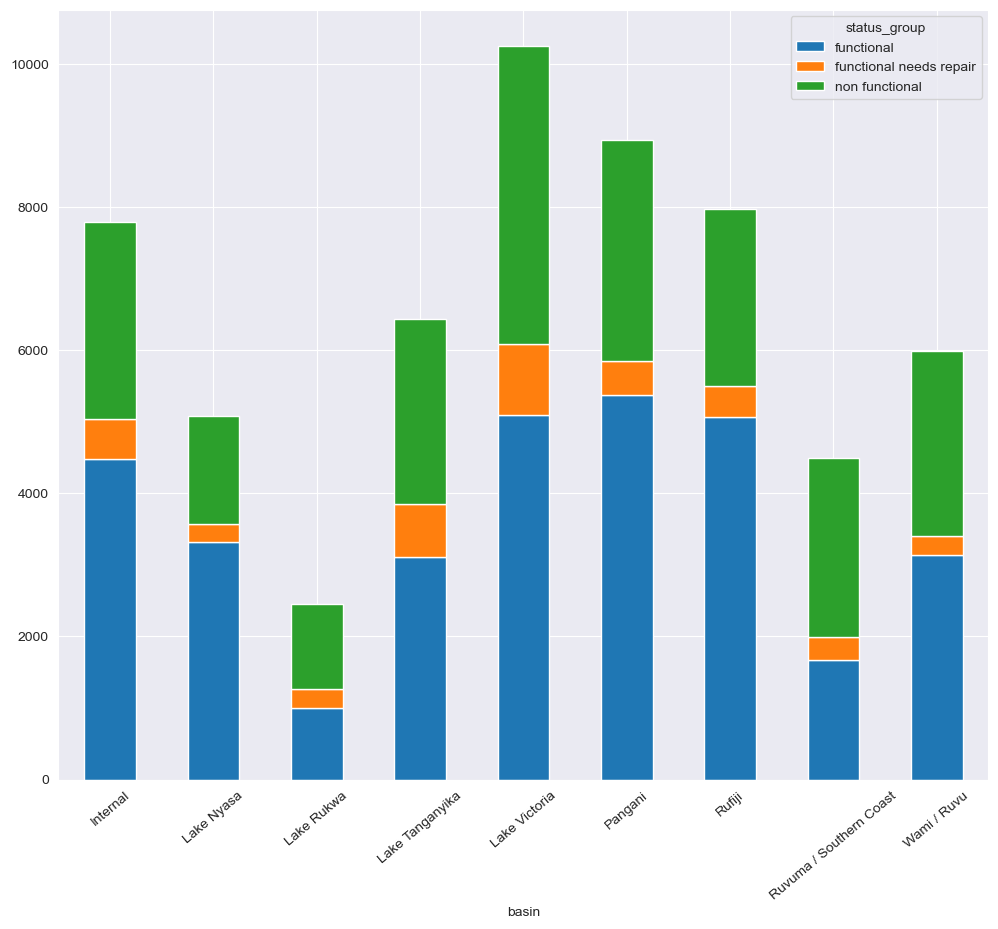

In [175]:
# Different basin affect the status?
plot = plot_df.groupby(['basin', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(10, 7), rot=40);

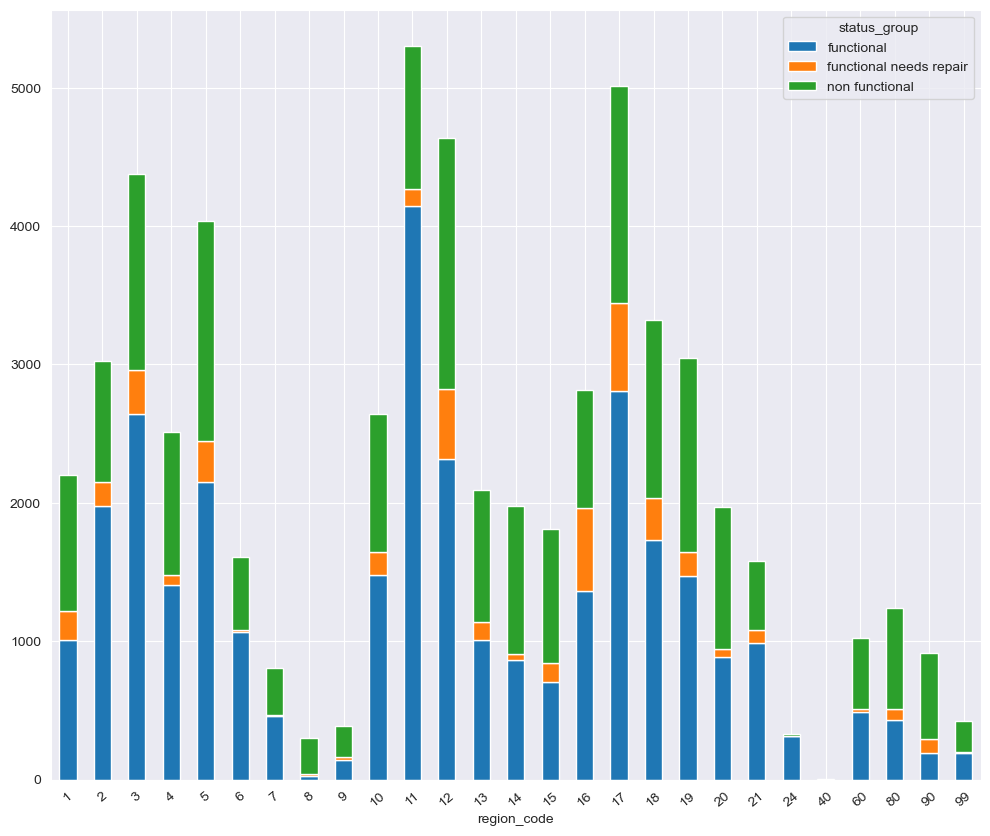

In [176]:
# Different region affect the status?
plot = plot_df.groupby(['region_code', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

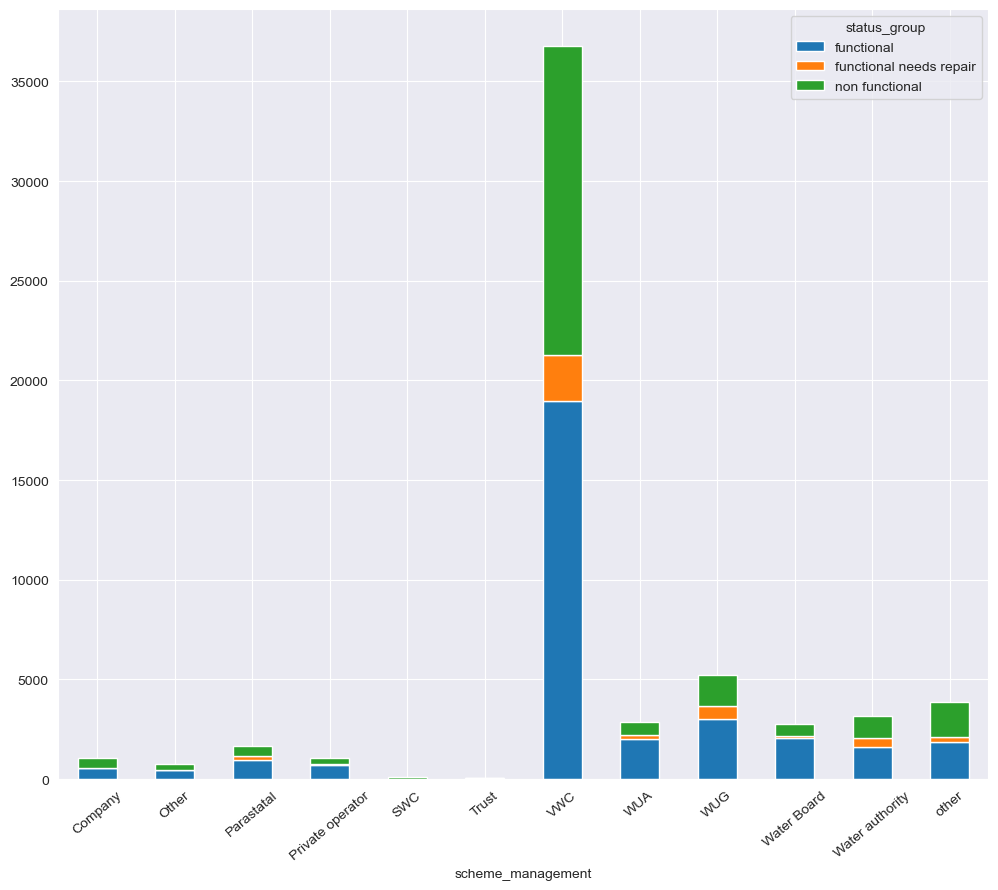

In [177]:
# Different scheme_management affect the status?
plot = plot_df.groupby(['scheme_management', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

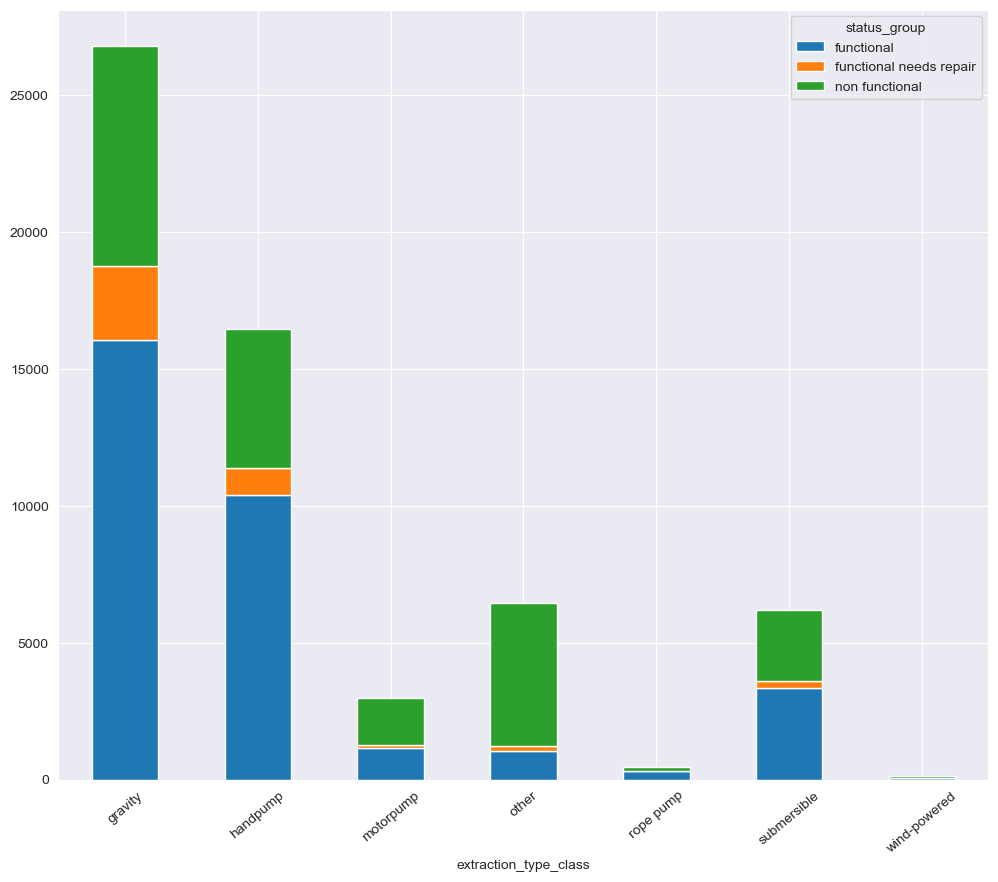

In [178]:
# Different extraction_type_class affect the status?
plot = plot_df.groupby(['extraction_type_class', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

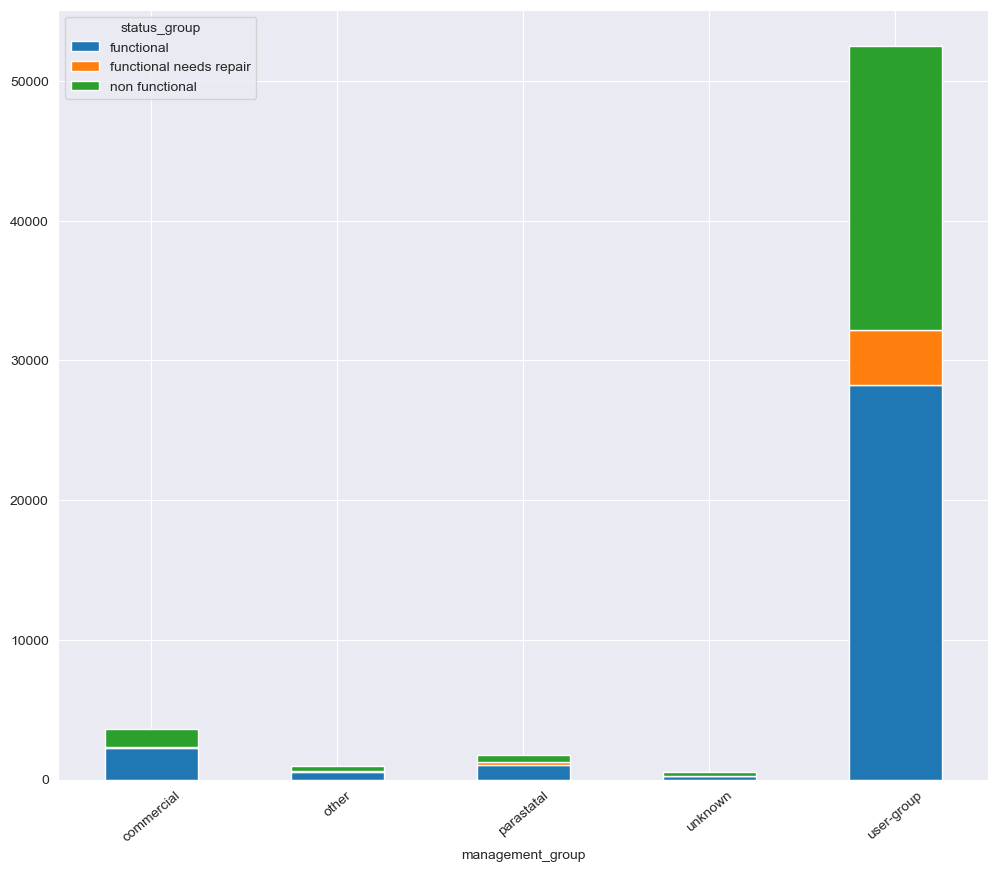

In [179]:
# Different management_group affect the status?
plot = plot_df.groupby(['management_group', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

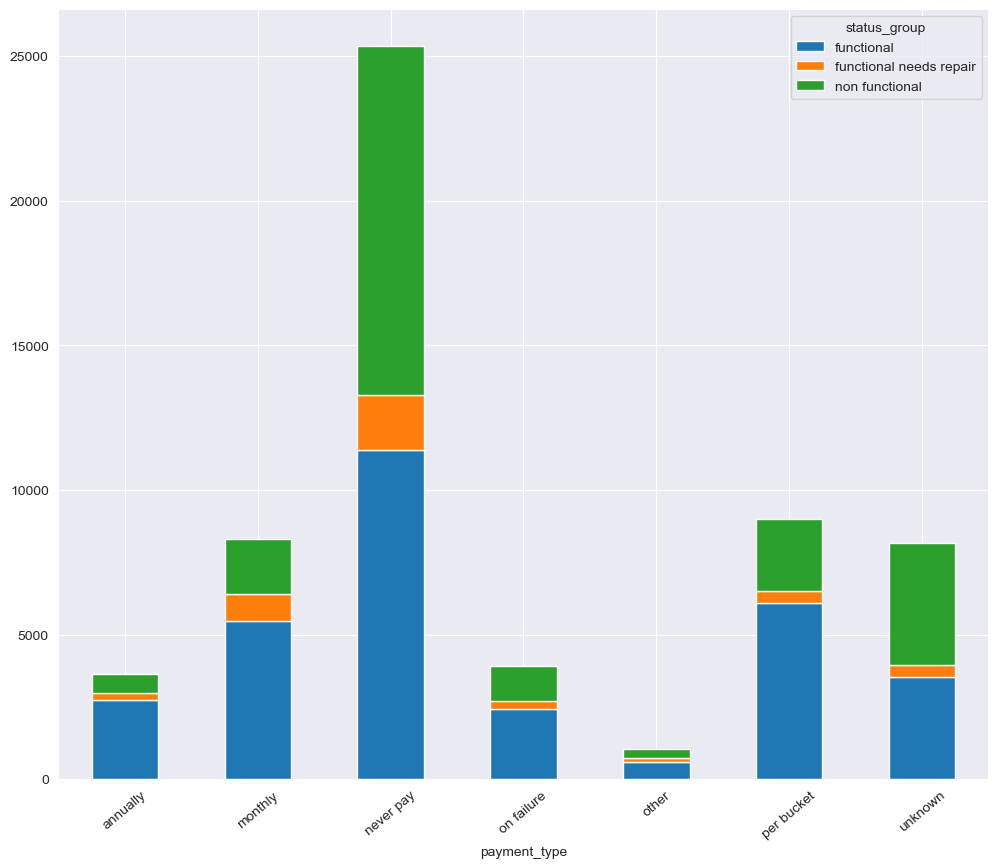

In [180]:
# Different extraction_type_class affect the status?
plot = plot_df.groupby(['payment_type', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

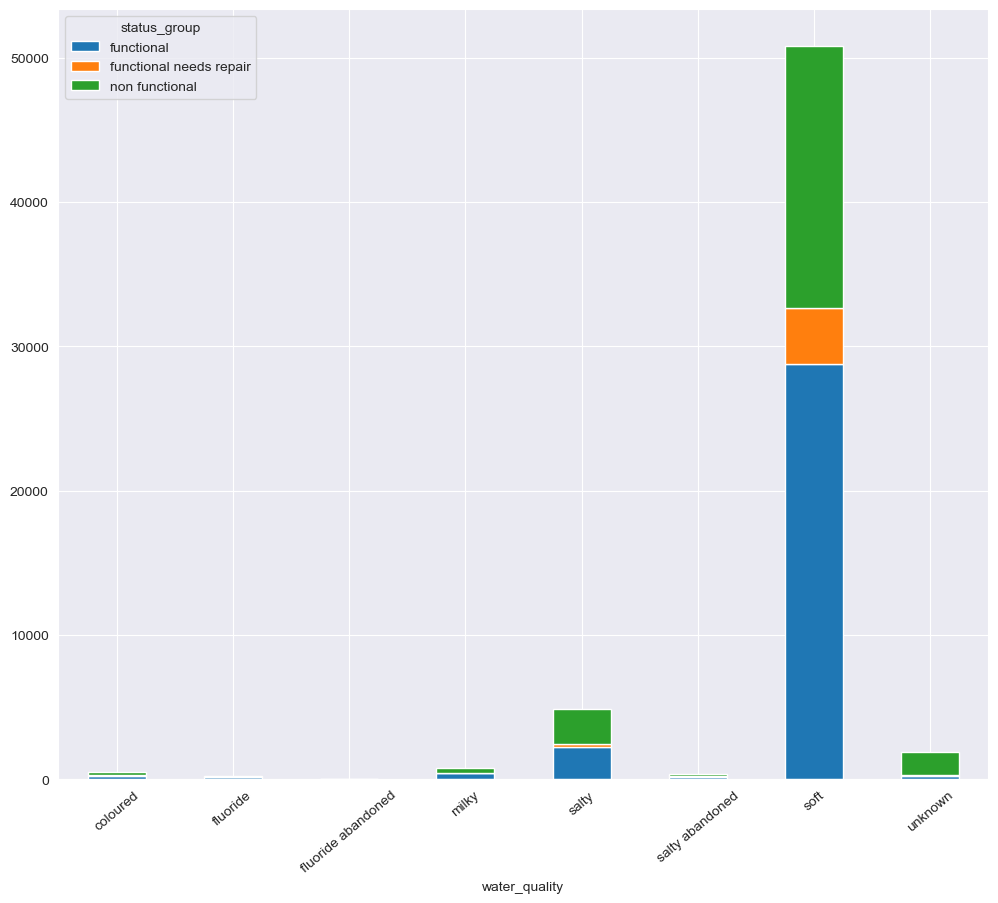

In [181]:
# Different water quality affect the status?
plot = plot_df.groupby(['water_quality', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

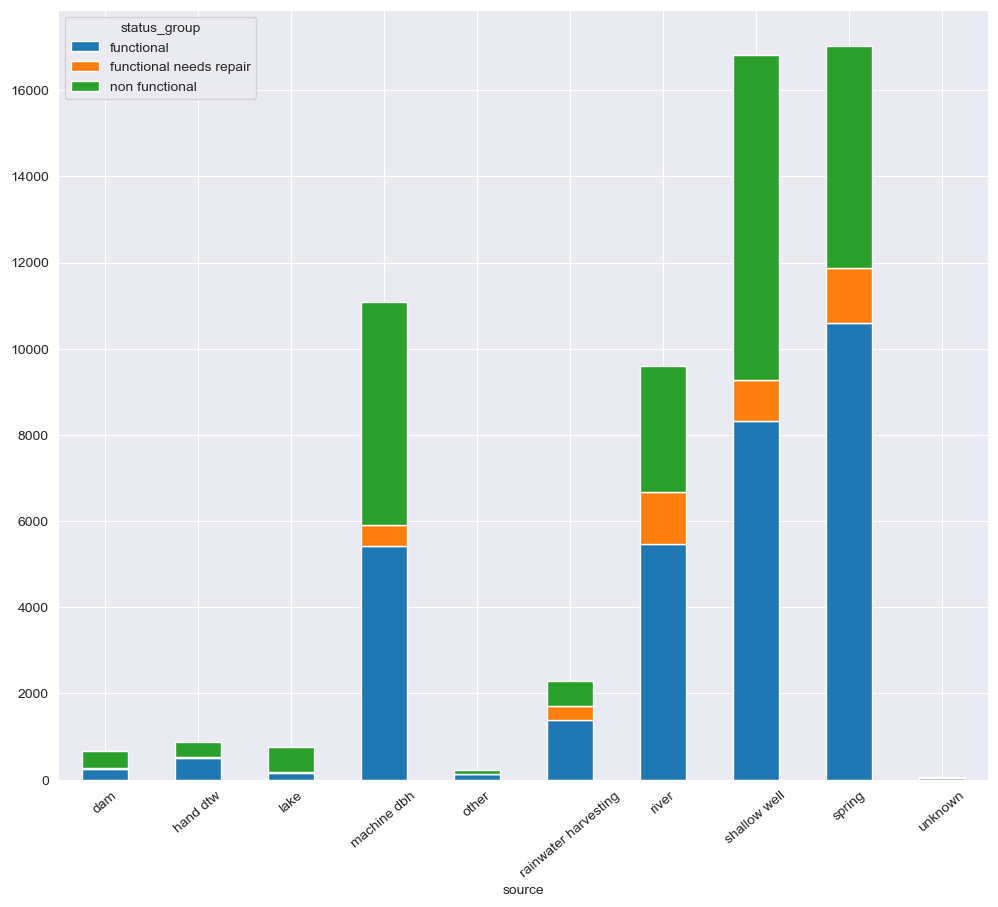

In [182]:
# Different sources affect the status?
plot = plot_df.groupby(['source', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

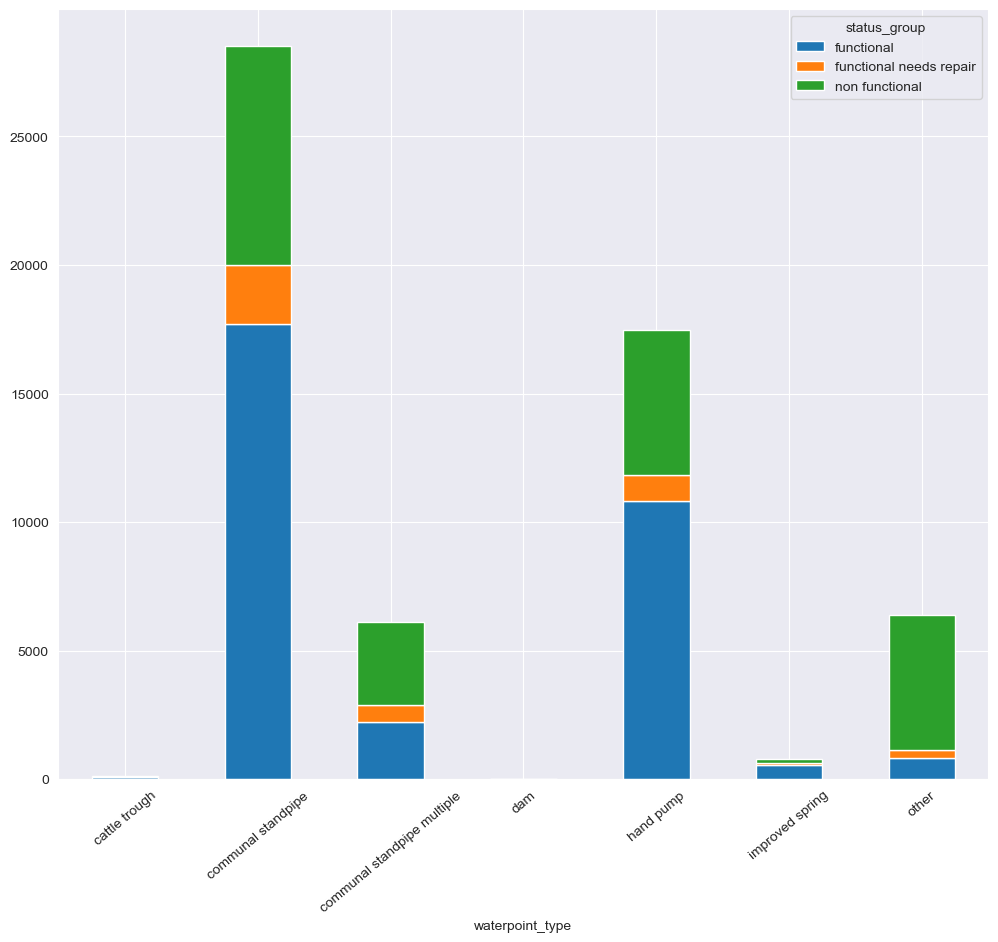

In [183]:
# Different waterpoints affect the status?
plot = plot_df.groupby(['waterpoint_type', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

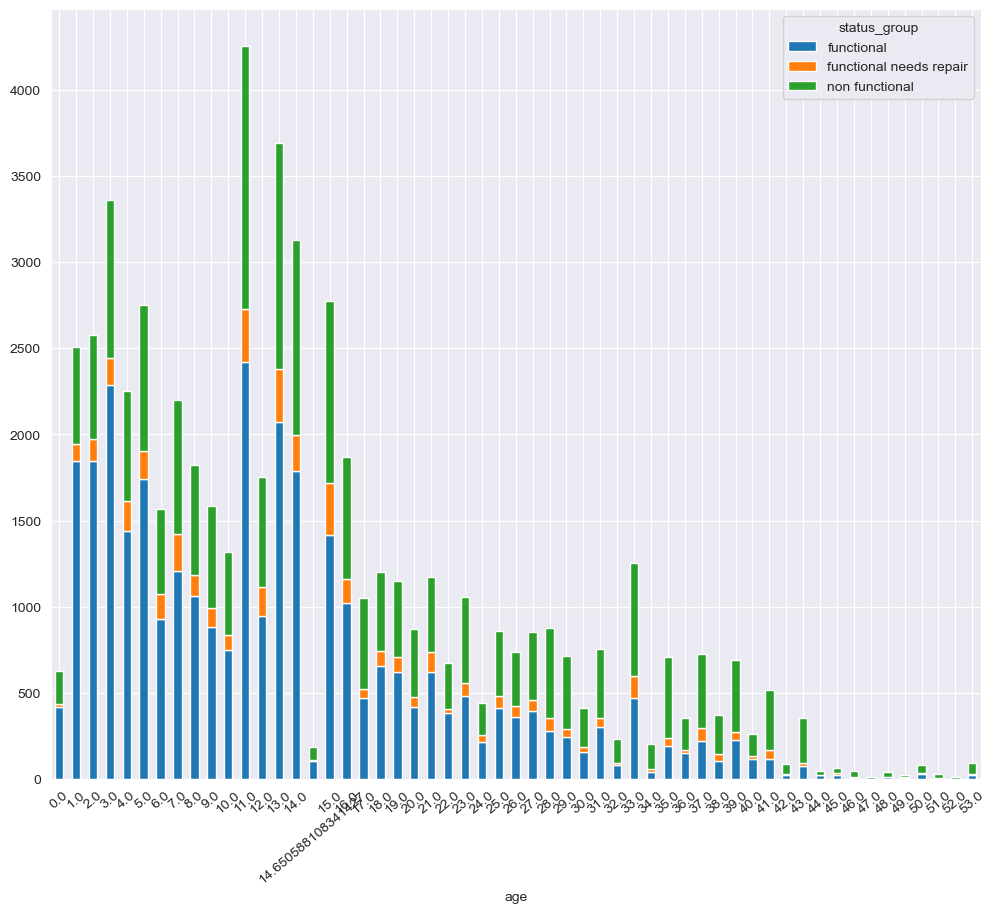

In [184]:
# Different ages affect the status?
plot = plot_df.groupby(['age', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

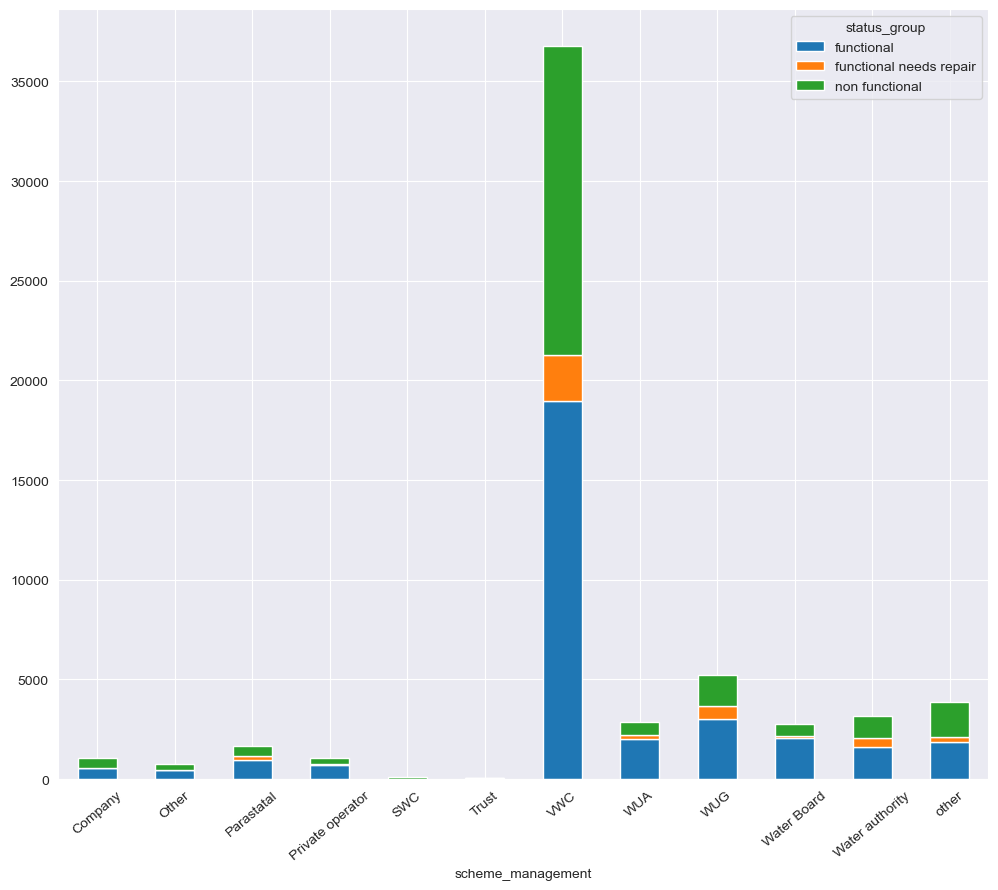

In [185]:
# Different scheme_management affect the status?
plot = plot_df.groupby(['scheme_management', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

In [186]:
# plotting the density of the different status with respect to GPS coordinates

# Split the plot_df into three based on status group
func_df = plot_df.loc[plot_df.status_group == 'functional']
nfunc_df = plot_df.loc[plot_df.status_group == 'non functional']
rfunc_df = plot_df.loc[plot_df.status_group == 'functional needs repair']

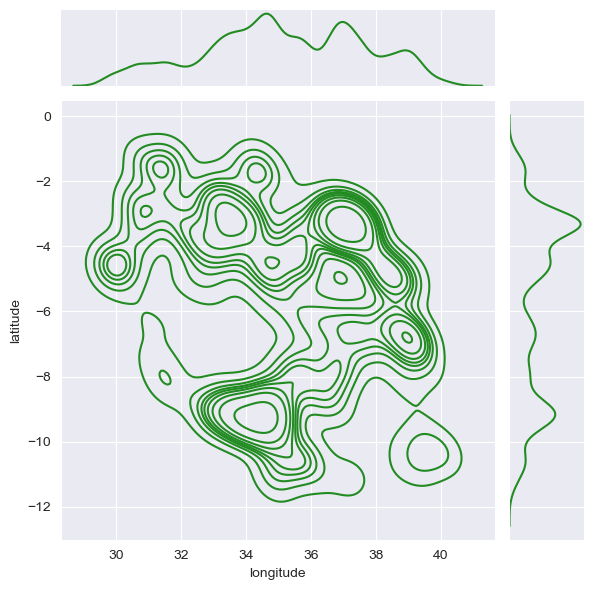

In [187]:
# Geographical distribution of functional pumps 
sns.jointplot(y=func_df['latitude'], x=func_df['longitude'], kind='kde', color='forestgreen')

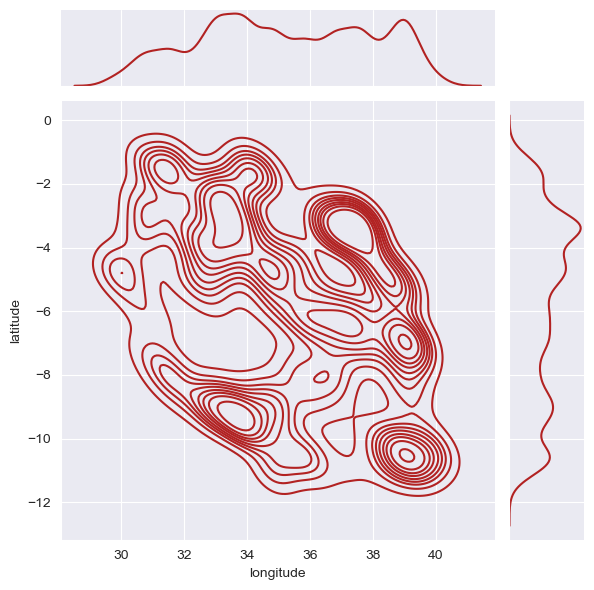

In [188]:
# Geographical distribution of non functional pumps
sns.jointplot(y=nfunc_df['latitude'], x=nfunc_df['longitude'], kind='kde', color='firebrick')

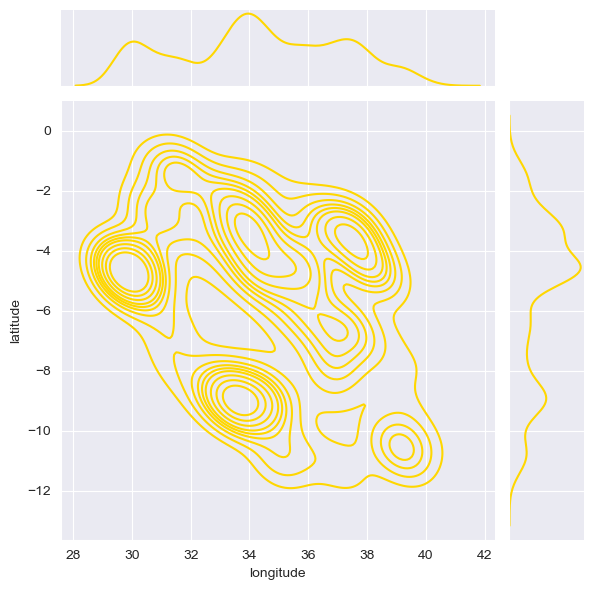

In [189]:
# Geographical distribution of functional/needs repair pumps
sns.jointplot(y=rfunc_df['latitude'], x=rfunc_df['longitude'], kind='kde', color='gold')

In [190]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   subvillage             59400 non-null  object 
 6   region                 59400 non-null  object 
 7   region_code            59400 non-null  int64  
 8   lga                    59400 non-null  object 
 9   ward                   59400 non-null  object 
 10  public_meeting         59400 non-null  int64  
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  bool   
 13  construction_year      59311 non-null  float64
 14  extraction_type_class  59400 non-null  object 
 15  ma

Text(0.5, 1.0, 'Corr')

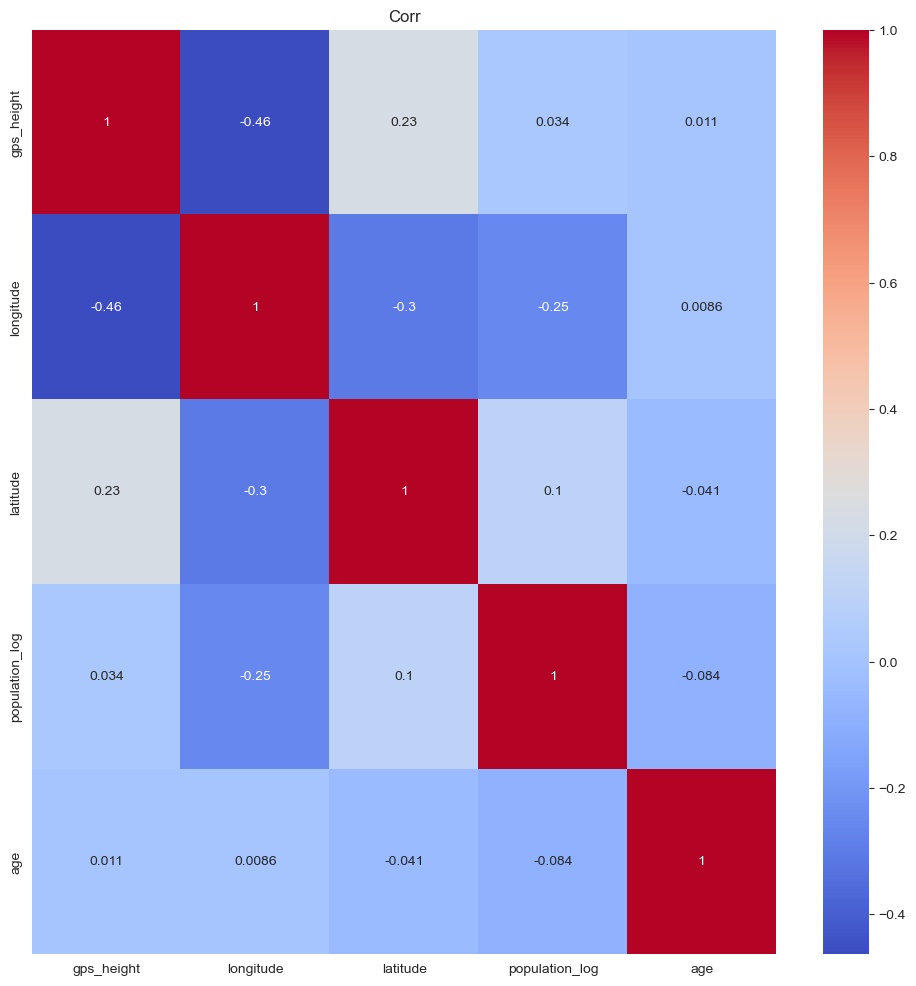

In [191]:
# Compute the correlation matrix
columns_for_correlation = ['gps_height', 'longitude', 'latitude',
                           'population_log', 'age','basin','payment_type','funder_category','installer_category','extraction_type_class']
correlation_matrix = plot_df[columns_for_correlation].corr()
correlation_matrix

fig = plt.figure(figsize=(12,12))
r = sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
r.set_title("Corr") #Correlation betweeen values

## 4. Factorization

In [192]:
# Drop the remaining useless columns
df_values_combined = df_values_combined.drop(['id', 'subvillage', 'lga', 'ward'], axis=1)

# List the categorical features
categorical = ['funder_category',
               'installer_category',
               'basin',
               'scheme_management',
               'extraction_type_class',
               'management',
               'management_group',
               'payment_type',
               'water_quality',
               'quantity',
               'source',
               'source_class',
               'waterpoint_type']

# And now factorize all the categorical features
for i in categorical:
    df_values_combined[i] = pd.factorize(all_data[i])[0]

In [193]:
# Splitting train and test
train = df_values_combined[0:len(df_values)]
test = df_values_combined[len(df_values):]

# Dropping the 'id' axis from the target
train_labels = df_label.drop(['id'], axis=1)

# And factorizing the target
labels = pd.factorize(train_labels.status_group)[0]

### Train-Test split and label factorization

status = {'functional': 0, 'non functional': 1, 'functional needs repair': 2, 'unknown': -1}
df_values_combined['result'] = df_values_combined['status_group'].map(status)

df_values_combined.info()

df_values_combined.drop(columns=['status_group'], inplace=True, errors='ignore')

df_values_combined.loc[:, 'result'].value_counts()

train_data = df_values_combined.loc[(df_values_combined['result'] != -1)]
test_data = df_values_combined.loc[(df_values_combined['result'] == -1)]
df_values_combined.drop(columns=['result'], inplace=True, errors='ignore')

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

x = train_data.loc[:, train_data.columns != 'result']
y = train_data.loc[:, train_data.columns == 'result']
x

## 6.Base Models

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score 
from sklearn.model_selection import train_test_split
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=test_size, random_state=seed)

In [195]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['region', 'status_group'], dtype='object')

In [196]:
# Identify categorical columns
categorical_cols = X_test.select_dtypes(include=['object']).columns
categorical_cols

Index(['region', 'status_group'], dtype='object')

In [197]:
X_train = X_train.drop(['status_group'], axis=1)


In [198]:
X_test= X_test.drop(['status_group'], axis=1)

In [199]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)

In [200]:
categorical_cols = X_test.select_dtypes(include=['object']).columns
X_test = pd.get_dummies(X_test, columns=categorical_cols)

In [201]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [202]:
categorical_cols = X_test.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [203]:
print(X_train.isnull().sum())


gps_height          0
longitude           0
latitude            0
basin               0
region_code         0
                   ..
region_Ruvuma       0
region_Shinyanga    0
region_Singida      0
region_Tabora       0
region_Tanga        0
Length: 48, dtype: int64


In [204]:
print(X_test.isnull().sum())

gps_height          0
longitude           0
latitude            0
basin               0
region_code         0
                   ..
region_Ruvuma       0
region_Shinyanga    0
region_Singida      0
region_Tabora       0
region_Tanga        0
Length: 48, dtype: int64


In [205]:
from sklearn.impute import SimpleImputer

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Convert the imputed array back to a DataFrame
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)



In [206]:


# Fit and transform the imputer on the training data
X_test_imputed = imputer.fit_transform(X_test)

# Convert the imputed array back to a DataFrame
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)



### 6.1. Random Forest Baseline

In [207]:

from sklearn.ensemble import RandomForestClassifier
# Define classifier
forest = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 79.67%
Precision: 79.03%


In [209]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

0     1    2
0  9311  1056  352
1  1514  5802  142
2   699   222  504

In [210]:
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

variable  importance
2                latitude    0.105403
1               longitude    0.104062
14               quantity    0.101970
0              gps_height    0.098270
24         population_log    0.066579
25                    age    0.054740
8       construction_year    0.052105
17        waterpoint_type    0.049183
9   extraction_type_class    0.046252
18                    amt    0.029272

### 6.2. XGBoost Baseline

In [211]:

from xgboost import XGBClassifier


In [212]:
# Defining Classifier
xgb = XGBClassifier(max_depth=10, n_estimators=300, booster='gbtree')

# Fit the model
xgb.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb.predict(X_test)


In [213]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 79.57%
Precision: 78.94%


In [214]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

0     1    2
0  9276  1069  374
1  1498  5816  144
2   701   219  505

In [215]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                pd.DataFrame(xgb.feature_importances_)], 
                                    axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

variable  importance
30          region_Iringa    0.129751
14               quantity    0.077608
36            region_Mara    0.060904
44       region_Shinyanga    0.042738
43          region_Ruvuma    0.040642
17        waterpoint_type    0.039821
9   extraction_type_class    0.039404
33     region_Kilimanjaro    0.025326
40          region_Mwanza    0.024719
31          region_Kagera    0.024582

### 6.3. CatBoost

In [216]:

from catboost import CatBoostClassifier
# Create an instance of CatBoostClassifier
model = CatBoostClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Learning rate set to 0.095481
0:	learn: 1.0348132	total: 151ms	remaining: 2m 31s
1:	learn: 0.9833084	total: 160ms	remaining: 1m 20s
2:	learn: 0.9420069	total: 170ms	remaining: 56.4s
3:	learn: 0.9067792	total: 180ms	remaining: 44.8s
4:	learn: 0.8779785	total: 190ms	remaining: 37.7s
5:	learn: 0.8526838	total: 199ms	remaining: 32.9s
6:	learn: 0.8312083	total: 209ms	remaining: 29.7s
7:	learn: 0.8130705	total: 222ms	remaining: 27.5s
8:	learn: 0.7971749	total: 236ms	remaining: 26s
9:	learn: 0.7835592	total: 246ms	remaining: 24.3s
10:	learn: 0.7722370	total: 256ms	remaining: 23s
11:	learn: 0.7613276	total: 265ms	remaining: 21.8s
12:	learn: 0.7514561	total: 275ms	remaining: 20.9s
13:	learn: 0.7429269	total: 284ms	remaining: 20s
14:	learn: 0.7346768	total: 294ms	remaining: 19.3s
15:	learn: 0.7279761	total: 303ms	remaining: 18.6s
16:	learn: 0.7217390	total: 313ms	remaining: 18.1s
17:	learn: 0.7165770	total: 323ms	remaining: 17.6s
18:	learn: 0.7113163	total: 334ms	remaining: 17.3s
19:	learn: 0.70

### 6.4 GradientBoost

In [238]:

from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
model = GradientBoostingClassifier(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,   # Learning rate for boosting
    max_depth=3,   # Maximum depth of the individual regression estimators
    random_state=42   # Random seed for reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.747984899500051


### 6.5. TabNet

In [218]:

import torch
from pytorch_tabnet.tab_model import TabNetClassifier
# Convert DataFrames to NumPy arrays
X_train_1 = X_train.values
y_train_1 = y_train
X_test_1 = X_test.values
y_test_1 = y_test
# Initialize the TabNet classifier
model = TabNetClassifier(optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,scheduler_params=dict(step_size=10),
    mask_type='sparsemax' )

# Train the model
model.fit(X_train_1, y_train_1)

# Make predictions on the test set
y_pred = model.predict(X_test_1)



epoch 0  | loss: 1.0304  |  0:00:02s
epoch 1  | loss: 0.83809 |  0:00:04s
epoch 2  | loss: 0.81461 |  0:00:06s
epoch 3  | loss: 0.78859 |  0:00:08s
epoch 4  | loss: 0.76834 |  0:00:10s
epoch 5  | loss: 0.75342 |  0:00:13s
epoch 6  | loss: 0.74509 |  0:00:15s
epoch 7  | loss: 0.72822 |  0:00:17s
epoch 8  | loss: 0.72188 |  0:00:21s
epoch 9  | loss: 0.71507 |  0:00:23s
epoch 10 | loss: 0.70999 |  0:00:25s
epoch 11 | loss: 0.72267 |  0:00:28s
epoch 12 | loss: 0.71536 |  0:00:30s
epoch 13 | loss: 0.70604 |  0:00:32s
epoch 14 | loss: 0.69746 |  0:00:34s
epoch 15 | loss: 0.68841 |  0:00:36s
epoch 16 | loss: 0.69168 |  0:00:40s
epoch 17 | loss: 0.68985 |  0:00:43s
epoch 18 | loss: 0.68513 |  0:00:45s
epoch 19 | loss: 0.67865 |  0:00:47s
epoch 20 | loss: 0.6761  |  0:00:49s
epoch 21 | loss: 0.67704 |  0:00:52s
epoch 22 | loss: 0.66767 |  0:00:54s
epoch 23 | loss: 0.66462 |  0:00:57s
epoch 24 | loss: 0.66364 |  0:00:59s
epoch 25 | loss: 0.66565 |  0:01:01s
epoch 26 | loss: 0.66357 |  0:01:04s
e

In [219]:
# Calculate accuracy
accuracy = accuracy_score(y_test_1, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7521171309050096


## 7. Hyperparameter Tuning

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

### 7.1. Random Forest

In [221]:
# Defining the classifier 
forest = RandomForestClassifier()

In [222]:
param_dist = dict(n_estimators=[280, 300, 320],
                  max_features=['log2', 'sqrt'],
                  max_depth=[18, 20, 22],
                  min_samples_split=[3, 5, 6])

In [223]:
# Defining the random search
cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
cv.fit(X_train, y_train)

# Returning best set of parameter and best cross validated score (accuracy)
print("Best parameters:", cv.best_params_)
print("Best score:", cv.best_score_.round(6))

Best parameters: {'n_estimators': 300, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 22}
Best score: 0.797352


### 7.2. XGBoost

In [225]:
# defining the dlassifier 
xgb = XGBClassifier()
# First Search
# Best parameters: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.3, 'booster': 'gbtree'}
# Best score: 0.795166

# Second Search
#param_dist = dict(n_estimators=[50, 100, 500, 1000],
#                  max_depth=[10, 25, 50],
#                  learning_rate=[0.1, 0.3, 0.5, 0.7],
#                  booster = ['gbtree', 'dart'])
    
# Third Search
param_dist = dict(n_estimators=[50, 250, 300 ],
                  max_depth=[10, 20,  5],
                  learning_rate=[0.1, 0.2, 0.3],
                  booster = ['gbtree'])

In [226]:
cv = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3)

#Fitting the search
cv.fit(X_train, y_train)

#Returning best set of parameter and best cross validated score (accuracy)
print("Best parameters:", cv.best_params_)
print("Best score:", cv.best_score_.round(6))

Best parameters: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.3, 'booster': 'gbtree'}
Best score: 0.794085


### 7.3. CatBoost

In [227]:
# Define the parameter grid for tuning 
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8,10]
}

# Create a CatBoostClassifier object
model = CatBoostClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

0:	learn: 1.0919389	total: 8.09ms	remaining: 801ms
1:	learn: 1.0855256	total: 15.1ms	remaining: 741ms
2:	learn: 1.0790861	total: 21.4ms	remaining: 692ms
3:	learn: 1.0728406	total: 28ms	remaining: 671ms
4:	learn: 1.0667889	total: 34.6ms	remaining: 658ms
5:	learn: 1.0610274	total: 40.7ms	remaining: 637ms
6:	learn: 1.0552572	total: 46.1ms	remaining: 612ms
7:	learn: 1.0495918	total: 51.4ms	remaining: 591ms
8:	learn: 1.0441115	total: 56.9ms	remaining: 576ms
9:	learn: 1.0387254	total: 62.8ms	remaining: 565ms
10:	learn: 1.0333237	total: 68.6ms	remaining: 555ms
11:	learn: 1.0280915	total: 74.1ms	remaining: 543ms
12:	learn: 1.0230007	total: 79.5ms	remaining: 532ms
13:	learn: 1.0179678	total: 85.3ms	remaining: 524ms
14:	learn: 1.0131014	total: 90.7ms	remaining: 514ms
15:	learn: 1.0083216	total: 97.4ms	remaining: 511ms
16:	learn: 1.0037131	total: 103ms	remaining: 505ms
17:	learn: 0.9991121	total: 109ms	remaining: 497ms
18:	learn: 0.9947319	total: 114ms	remaining: 488ms
19:	learn: 0.9903268	total:

## 8. Model Stacking

In [240]:
from mlxtend.classifier import StackingClassifier
# model 1: random forest with tuned parameters 
clf1 = RandomForestClassifier(n_estimators=320, 
                                min_samples_split=5, 
                                max_features='sqrt', 
                                max_depth=22, 
                                random_state=42)

#clf2 = XGBClassifier(max_depth=10, 
#                     n_estimators=300, 
#                     booster='gbtree')
#model 3: CatBoost with tuned parameters
clf3 = CatBoostClassifier(depth=10, iterations=300, learning_rate=0.1)
# meta-classifier: random forest
mcl = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=5, 
                                max_features='sqrt', 
                                max_depth=50, 
                                random_state=42)

# defining stacker
sclf = StackingClassifier(classifiers=[clf1, clf3], 
                          meta_classifier=mcl)

In [241]:
# Fitting the model
sclf.fit(X_train, y_train)
# make predictions for test data
y_pred = sclf.predict(X_test)

0:	learn: 1.0261523	total: 85.2ms	remaining: 25.5s
1:	learn: 0.9704723	total: 167ms	remaining: 24.9s
2:	learn: 0.9255688	total: 248ms	remaining: 24.6s
3:	learn: 0.8876331	total: 330ms	remaining: 24.4s
4:	learn: 0.8545673	total: 405ms	remaining: 23.9s
5:	learn: 0.8265236	total: 477ms	remaining: 23.4s
6:	learn: 0.8016847	total: 557ms	remaining: 23.3s
7:	learn: 0.7803963	total: 632ms	remaining: 23.1s
8:	learn: 0.7617970	total: 707ms	remaining: 22.9s
9:	learn: 0.7448174	total: 788ms	remaining: 22.8s
10:	learn: 0.7299988	total: 872ms	remaining: 22.9s
11:	learn: 0.7175616	total: 960ms	remaining: 23s
12:	learn: 0.7055848	total: 1.03s	remaining: 22.8s
13:	learn: 0.6962530	total: 1.11s	remaining: 22.6s
14:	learn: 0.6877062	total: 1.18s	remaining: 22.5s
15:	learn: 0.6780983	total: 1.26s	remaining: 22.3s
16:	learn: 0.6685014	total: 1.33s	remaining: 22.2s
17:	learn: 0.6613096	total: 1.42s	remaining: 22.2s
18:	learn: 0.6541280	total: 1.49s	remaining: 22.1s
19:	learn: 0.6473837	total: 1.58s	remainin

In [242]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 80.68%
Precision: 80.13%
